* Name: Amit Kumar Gupta
* PRN : 8006
* Date : 28Dec,2024

In [2]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import warnings
warnings.filterwarnings('ignore')

## One hidden layer

In [5]:
# Global variables
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
N_SAMPLE = 1000
TEST_SIZE = 0.2
ALPHA = 0.1 # learning rate
NOISE = 0.2 # Error
EPOCHS = 2000

In [6]:
inpDir = './input'
outDir = './output'

In [7]:
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
Sklearn make_moons

In [9]:
X,y = datasets.make_moons(
        n_samples = N_SAMPLE,
        noise = NOISE,
        shuffle  = True,
        random_state = RANDOM_STATE
)
X.shape, y.shape

((1000, 2), (1000,))

EDA 
1: plot data

<Axes: xlabel='A', ylabel='B'>

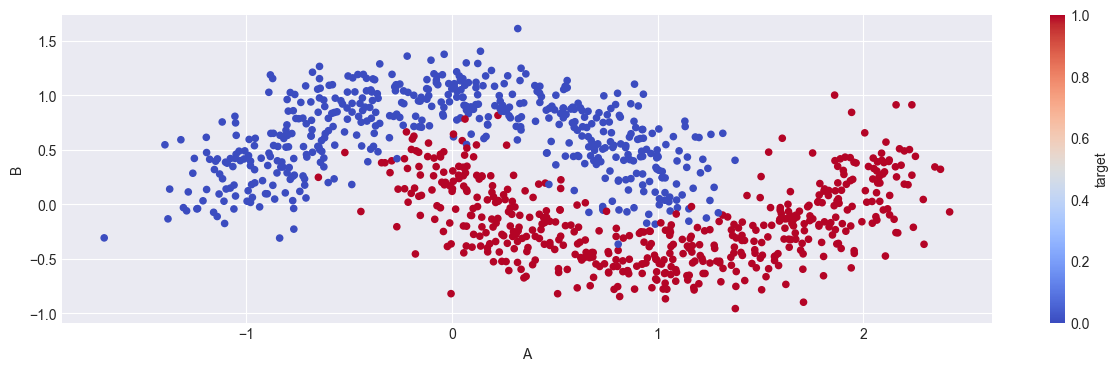

In [11]:

data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

data_df.plot.scatter('A','B',c= 'target', cmap=CMAP)

In [12]:
def predict(row, wgts):
    z = wgts[0] # b/ w0
    for i in range(len(row) - 1):# w1x1 + w2x2...+b 
        z += wgts[i+1] * row[i]
    return 1 if z>= 0 else 0 # stepwise Activation Function
        

In [13]:
# unit testing
weights = np.array([0.1,2.0, 1.0])
predict(data_df.loc[0].values, weights)


1

EDA
1: Plot the Data
2: print min.max, average 

In [15]:
data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [16]:
features_df = data_df.drop('target', axis=1)
labels = data_df['target']

In [17]:
data_train , data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [19]:
rng = np.random.default_rng(seed=RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generated weights
    m= train.shape[0] # number of samples
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1] # a-y
            sum_error += (prediction - row[-1]) ** 2 # sum of squared error
            weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
            for i in range(len(row) - 1):
                weights[i+1] += -alpha * row[i] * dz / m
        errors.append(sum_error / m)
    return errors, weights

In [20]:
errors,weights = train_weights(data_train,ALPHA, EPOCHS)

In [21]:
weights, len(errors)

(array([-6.44966640e-05,  2.84622562e-04, -4.06978625e-04]), 2000)

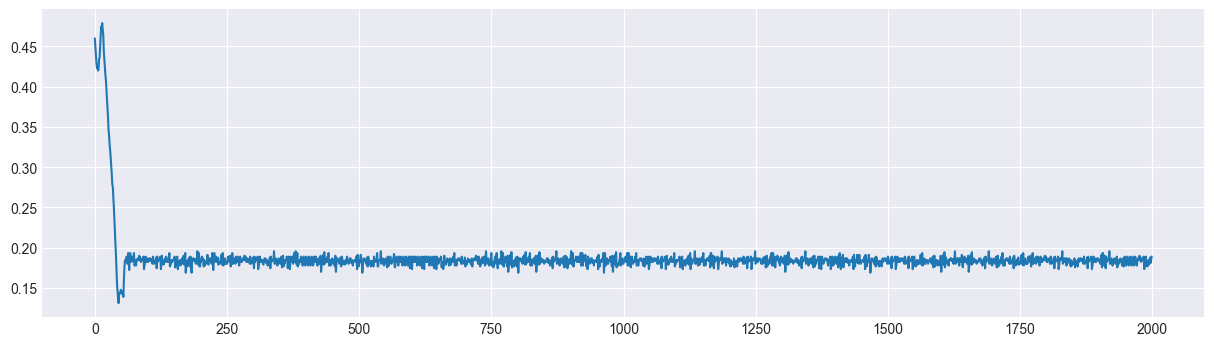

In [22]:
fig, ax = plt.subplots()
ax.plot(errors)

In [23]:
def fn_plot_decision_boundary(wts,X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.01
    # Min and Max Along Two Axis 
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    #dummy column 
    
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))
    y_pred = []
    for row in XX:
        y_p = predict(row, wts)
        y_pred.append(y_p)
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors = 'k', cmap=CMAP)


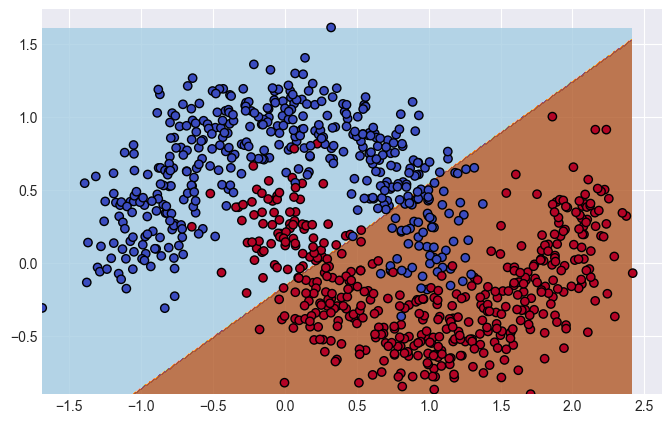

In [24]:
fn_plot_decision_boundary(weights, data_train)

In [25]:
matplotlib.__version__

'3.9.2'

## Tanh Activation Function

In [27]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(z):
    return 1 - (np.tanh(z))**2

In [28]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [29]:
def fn_loss_calculate_loss():
    pass

## Split DATA in Test Train

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [32]:
def build_model(nn_hdim, X_t, y_t):
    '''
    2-4-1
    '''
    m, nn_input_dim = X_t.shape
    nn_output_shape = y_t.shape[1]

    W1 = rng.random((nn_input_dim, nn_hdim), dtype = np.float32) / np.sqrt(nn_input_dim)
    W2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32)/np.sqrt(nn_hdim)
    print(W1.shape, W2.shape)

In [33]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [34]:
build_model(4,X_train,y_train )

(2, 4) (4, 1)


In [38]:
def fn_plot_decision_boundary(wts,X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.01
    # Min and Max Along Two Axis 
    x_min, x_max = X[:,0].min(), X[:,0].max() # x min MAX
    y_min, y_max = X[:,1].min(), X[:,1].max()

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    #dummy column 
    
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))
    y_pred = []
    for row in XX:
        a = predict(row, wts)
        y_p = 0
        if  a>= 0.5:
            y_p = 1
        y_pred.append(y_p)
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors = 'k', cmap=CMAP)


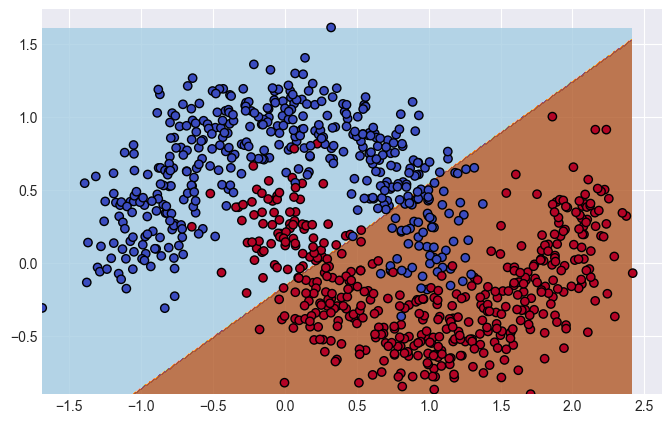

In [39]:
fn_plot_decision_boundary(weights, data_train)

## Meshgrid working

In [41]:
X = data_train
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
x_min, x_max

(-1.6887948667123656, 2.4191131281804545)

In [42]:
dm = 0.5
np.arange(x_min, x_max, dm)

array([-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
        0.81120513,  1.31120513,  1.81120513,  2.31120513])

In [43]:
np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))

[array([[-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513],
        [-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513],
        [-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513],
        [-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513],
        [-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513],
        [-1.68879487, -1.18879487, -0.68879487, -0.18879487,  0.31120513,
          0.81120513,  1.31120513,  1.81120513,  2.31120513]]),
 array([[-0.89688727, -0.89688727, -0.89688727, -0.89688727, -0.89688727,
         -0.89688727, -0.89688727, -0.89688727, -0.89688727],
        [-0.39688727, -0.39688727, -0.39688727

## Accuracies, Confusion Matrix

## Train Data



In [46]:
preds = []
for row in data_train:
    a = predict(row,weights)
    y_pred = 0
    if a>= 0.5: y_pred = 1
    preds.append(y_pred)

accuracy_score(data_train[:,-1], preds)

0.83

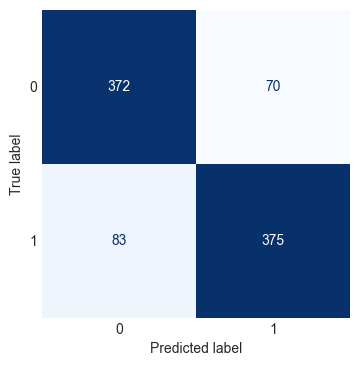

In [47]:
cm = confusion_matrix(data_train[:,-1], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

## test data

In [49]:
preds = []
for row in data_test:
    a = predict(row,weights)
    y_pred = 0
    if a>= 0.5: y_pred = 1
    preds.append(y_pred)

accuracy_score(data_test[:,-1], preds)

0.89

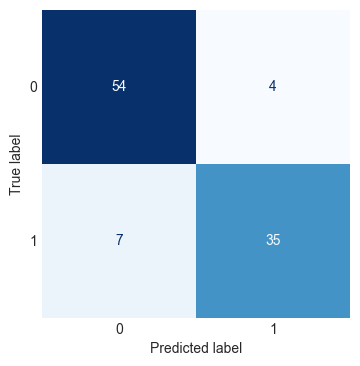

In [50]:
cm = confusion_matrix(data_test[:,-1], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)